# ROSE DATASET


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import calendar
from pylab import rcParams

In [3]:
df = pd.read_csv("Rose.csv", parse_dates=['YearMonth'], index_col='YearMonth')

In [4]:
df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [5]:
df.dtypes

Rose    float64
dtype: object

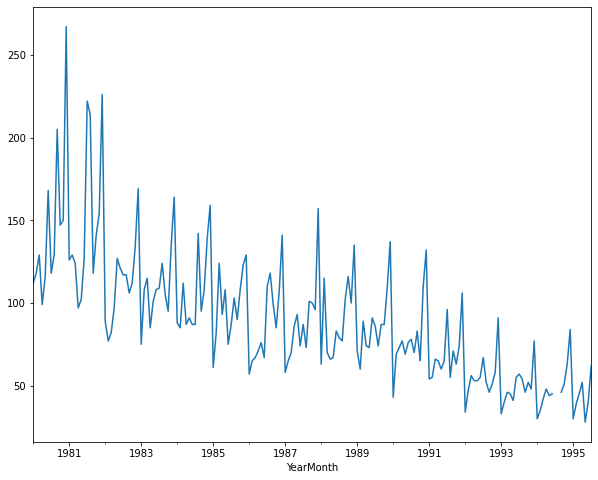

In [6]:
#Increase the figure size
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
df['Rose'].plot()
plt.show()

In [7]:
df.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [8]:
df['Rose'].isnull().sum()

2

In [9]:
df.fillna(method='bfill', inplace = True)
df['Rose'].isnull().sum()

0

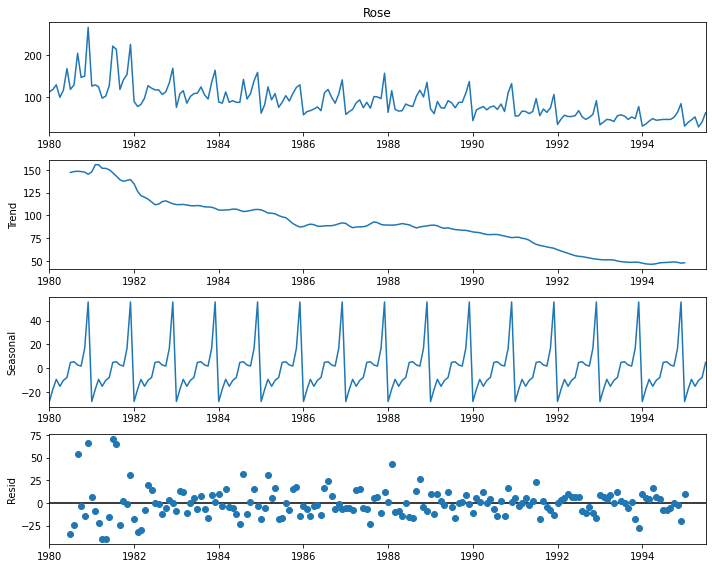

In [10]:

df_add_decompose = seasonal_decompose(df['Rose'],model = 'additive', period=12)
df_add_decompose.plot()
plt.show()

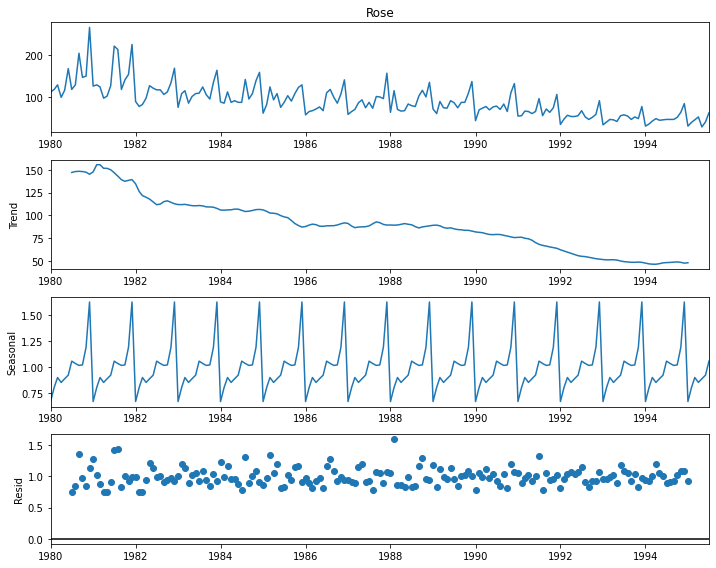

In [11]:
df_multi_decompose = seasonal_decompose(df['Rose'], model='multiplicative', period = 12)
df_multi_decompose.plot()
plt.show()

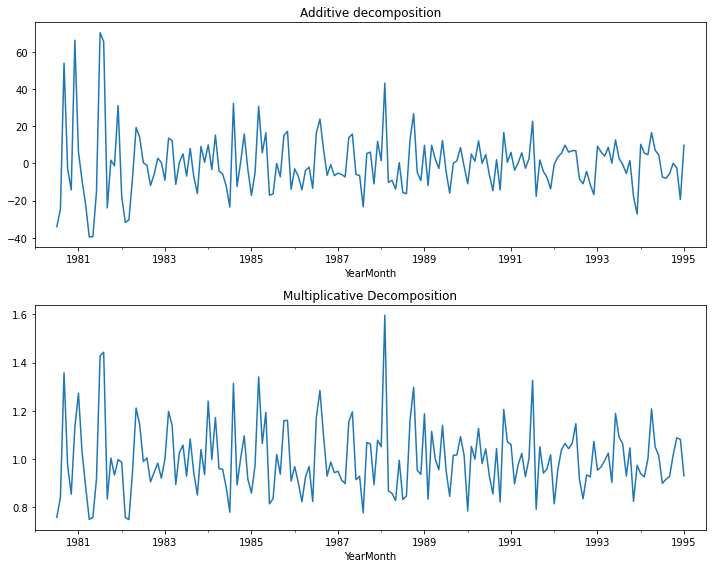

In [12]:

plt.subplot(2,1,1)
plt.title('Additive decomposition')
df_add_decompose.resid.plot()


plt.subplot(2,1,2)
plt.title('Multiplicative Decomposition')
df_multi_decompose.resid.plot()
plt.tight_layout()
plt.show()

In [13]:
df['Month'] = df.index.month
df['Year'] = df.index.year

In [14]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
df.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


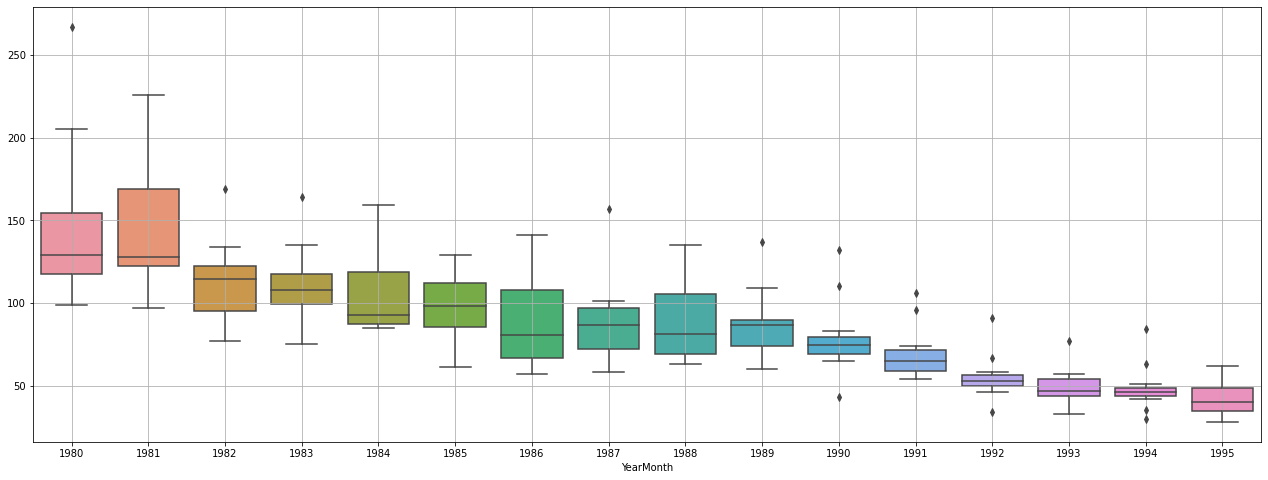

In [15]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df.values[:,0],ax=ax)
plt.grid();

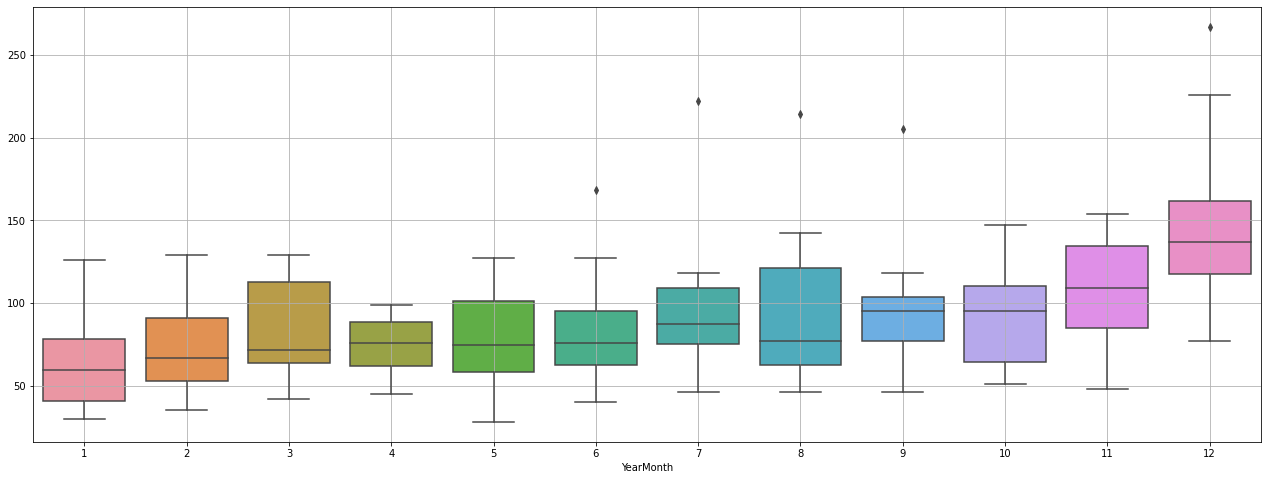

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month,y = df.values[:,0],ax=ax)
plt.grid();

## SPLIT DATA

In [17]:
df.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


In [18]:
test = df['01-01-1991':]
train = df[:'01-01-1991']

In [19]:
test.head()

,Rose,Month,Year
YearMonth,,,
1991-01-01,54.0,Jan,1991
1991-02-01,55.0,Feb,1991
1991-03-01,66.0,Mar,1991
1991-04-01,65.0,Apr,1991
1991-05-01,60.0,May,1991


In [20]:
print(train.shape)
print(test.shape)

(133, 3)
(55, 3)


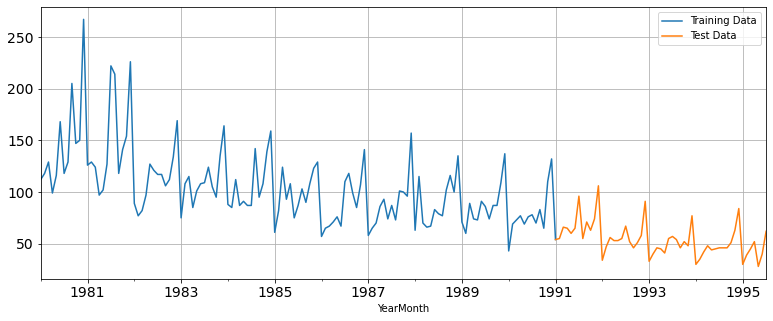

In [21]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

In [22]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+134 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133]
Test Time instance 
 [134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188]


## LINEAR REGRESSION

In [23]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [24]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time


In [25]:
lr = LinearRegression()

In [26]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

In [27]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

In [28]:
from sklearn import metrics

In [29]:
rmse_model1_test = metrics.mean_squared_error(test['Rose'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 14.935


In [30]:
resultsDf = pd.DataFrame({'Test RMSE': [rmse_model1_test]},index=['RegressionOnTime'])
resultsDf

,Test RMSE
RegressionOnTime,14.934579


In [31]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

## SIMPLE EXPONENTIAL SMOOTHING

In [32]:
SES_train = train.copy()
SES_test = test.copy()

In [33]:
model_SES = SimpleExpSmoothing(SES_train['Rose'])

In [34]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [35]:
model_SES_autofit.params

{'smoothing_level': 0.09764588980510863,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.41619408114488,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [36]:
test_predictions_model2 = model_SES_autofit.forecast(steps=len(test))
test_predictions_model2

1991-02-01    83.845231
1991-03-01    83.845231
1991-04-01    83.845231
1991-05-01    83.845231
1991-06-01    83.845231
1991-07-01    83.845231
1991-08-01    83.845231
1991-09-01    83.845231
1991-10-01    83.845231
1991-11-01    83.845231
1991-12-01    83.845231
1992-01-01    83.845231
1992-02-01    83.845231
1992-03-01    83.845231
1992-04-01    83.845231
1992-05-01    83.845231
1992-06-01    83.845231
1992-07-01    83.845231
1992-08-01    83.845231
1992-09-01    83.845231
1992-10-01    83.845231
1992-11-01    83.845231
1992-12-01    83.845231
1993-01-01    83.845231
1993-02-01    83.845231
1993-03-01    83.845231
1993-04-01    83.845231
1993-05-01    83.845231
1993-06-01    83.845231
1993-07-01    83.845231
1993-08-01    83.845231
1993-09-01    83.845231
1993-10-01    83.845231
1993-11-01    83.845231
1993-12-01    83.845231
1994-01-01    83.845231
1994-02-01    83.845231
1994-03-01    83.845231
1994-04-01    83.845231
1994-05-01    83.845231
1994-06-01    83.845231
1994-07-01    83

In [37]:
## Test Data - RMSE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],test_predictions_model2,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 33.859


In [38]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model2_test]}
                              ,index=['Alpha=0.0976:SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909


## DOUBLE EXPONENTIAL SMOOTHIGN

In [39]:
DES_train = train.copy()
DES_test = test.copy()

In [40]:
model_DES = Holt(SES_train['Rose'])

In [41]:
model_DES_autofit = model_DES.fit(optimized=True,use_brute=True)

In [111]:
model_DES_autofit.params

{'smoothing_level': 9.098504051752187e-07,
 'smoothing_trend': 1.8412431182457466e-08,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.08633631739735,
 'initial_trend': -0.5003917258354766,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [43]:
test_predictions_model3 = model_DES_autofit.forecast(steps=len(test))
test_predictions_model3

1991-02-01    71.033845
1991-03-01    70.533453
1991-04-01    70.033061
1991-05-01    69.532669
1991-06-01    69.032278
1991-07-01    68.531886
1991-08-01    68.031494
1991-09-01    67.531103
1991-10-01    67.030711
1991-11-01    66.530319
1991-12-01    66.029927
1992-01-01    65.529536
1992-02-01    65.029144
1992-03-01    64.528752
1992-04-01    64.028360
1992-05-01    63.527969
1992-06-01    63.027577
1992-07-01    62.527185
1992-08-01    62.026794
1992-09-01    61.526402
1992-10-01    61.026010
1992-11-01    60.525618
1992-12-01    60.025227
1993-01-01    59.524835
1993-02-01    59.024443
1993-03-01    58.524051
1993-04-01    58.023660
1993-05-01    57.523268
1993-06-01    57.022876
1993-07-01    56.522485
1993-08-01    56.022093
1993-09-01    55.521701
1993-10-01    55.021309
1993-11-01    54.520918
1993-12-01    54.020526
1994-01-01    53.520134
1994-02-01    53.019742
1994-03-01    52.519351
1994-04-01    52.018959
1994-05-01    51.518567
1994-06-01    51.018176
1994-07-01    50

In [44]:


rmse_model3_test = metrics.mean_squared_error(test['Rose'],test_predictions_model3,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 14.937


In [45]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                              ,index=['Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916


## TRIPLE EXPONENTIAL SMOOTHING

In [46]:
TES_train = train.copy()
TES_test = test.copy()

In [47]:
model_TES = ExponentialSmoothing(TES_train['Rose'],trend='multiplicative',seasonal='multiplicative')

In [48]:
model_TES_autofit = model_TES.fit(optimized=True,use_brute=True)

In [49]:
model_TES_autofit.params

{'smoothing_level': 0.075736443908668,
 'smoothing_trend': 0.054095230994916865,
 'smoothing_seasonal': 0.41076802008127705,
 'damping_trend': nan,
 'initial_level': 74.76302257024037,
 'initial_trend': 1.0063884869742872,
 'initial_seasons': array([1.64424724, 1.71000839, 1.80391887, 1.56482856, 1.74024994,
        2.24741506, 2.19948312, 2.28667059, 2.74243282, 2.03538837,
        2.19031921, 3.57179474]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [50]:
test_predictions_model4 = model_TES_autofit.forecast(steps=len(test))
test_predictions_model4

1991-02-01     66.904608
1991-03-01     70.775426
1991-04-01     68.492129
1991-05-01     66.272064
1991-06-01     72.638237
1991-07-01     74.695808
1991-08-01     69.280776
1991-09-01     81.059757
1991-10-01     75.543997
1991-11-01     98.503516
1991-12-01    124.071024
1992-01-01     48.578117
1992-02-01     63.999124
1992-03-01     67.701843
1992-04-01     65.517702
1992-05-01     63.394050
1992-06-01     69.483756
1992-07-01     71.451973
1992-08-01     66.272101
1992-09-01     77.539552
1992-10-01     72.263328
1992-11-01     94.225778
1992-12-01    118.682958
1993-01-01     46.468502
1993-02-01     61.219816
1993-03-01     64.761736
1993-04-01     62.672447
1993-05-01     60.641019
1993-06-01     66.466266
1993-07-01     68.349009
1993-08-01     63.394085
1993-09-01     74.172221
1993-10-01     69.125129
1993-11-01     90.133809
1993-12-01    113.528881
1994-01-01     44.450502
1994-02-01     58.561207
1994-03-01     61.949311
1994-04-01     59.950754
1994-05-01     58.007545


In [51]:
rmse_model4_test = metrics.mean_squared_error(test['Rose'],test_predictions_model4,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 27.814


In [52]:
temp_resultsDf = pd.DataFrame({'Test RMSE': [rmse_model4_test]}
                              ,index=['Alpha=0.076,Beta=0.054,Gamma=0.410:TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, temp_resultsDf])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988


## NAIVE MODEL

In [53]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [54]:
train.tail()

,Rose,Month,Year
YearMonth,,,
1990-09-01,83.0,Sep,1990
1990-10-01,65.0,Oct,1990
1990-11-01,110.0,Nov,1990
1990-12-01,132.0,Dec,1990
1991-01-01,54.0,Jan,1991


In [55]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    54.0
1991-02-01    54.0
1991-03-01    54.0
1991-04-01    54.0
1991-05-01    54.0
Name: naive, dtype: float64

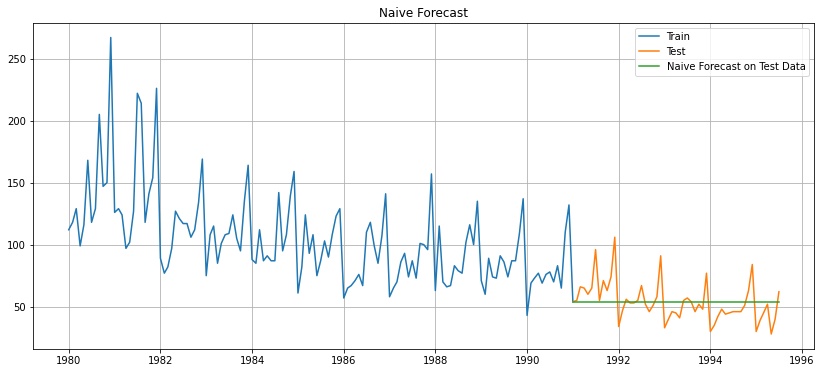

In [56]:
plt.subplots(figsize=(14,6))

plt.plot(NaiveModel_train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [57]:
rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'],squared=False)
print("For Naive Bayes forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For Naive Bayes forecast on the Test Data,  RMSE is 15.751


In [58]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988
NaiveModel,15.750902


## SIMPLE AVERAGE

In [59]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [60]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,Month,Year,mean_forecast
YearMonth,,,,
1991-01-01,54.0,Jan,1991,104.556391
1991-02-01,55.0,Feb,1991,104.556391
1991-03-01,66.0,Mar,1991,104.556391
1991-04-01,65.0,Apr,1991,104.556391
1991-05-01,60.0,May,1991,104.556391


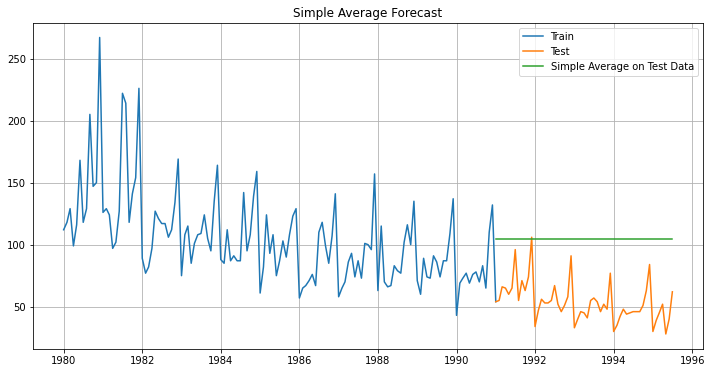

In [61]:
plt.subplots(figsize=(12,6))

plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [62]:
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 53.075


In [63]:
resultsDf_3 = pd.DataFrame({'Test RMSE': [rmse_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988
NaiveModel,15.750902
SimpleAverageModel,53.074556


## MOVING AVERAGE

In [64]:
MovingAverage = df.copy()
MovingAverage.head()

,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


In [112]:
MovingAverage['Trailing_3'] = MovingAverage['Rose'].rolling(3).mean()
MovingAverage['Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage['Trailing_12'] = MovingAverage['Rose'].rolling(12).mean()

MovingAverage.head(15)


,Rose,Month,Year,Trailing_3,Trailing_6,Trailing_9,Trailing_12
YearMonth,,,,,,,
1980-01-01,112.0,Jan,1980,NaN,NaN,NaN,NaN
1980-02-01,118.0,Feb,1980,NaN,NaN,NaN,NaN
1980-03-01,129.0,Mar,1980,119.666667,NaN,NaN,NaN
1980-04-01,99.0,Apr,1980,115.333333,NaN,NaN,NaN
1980-05-01,116.0,May,1980,114.666667,NaN,NaN,NaN
1980-06-01,168.0,Jun,1980,127.666667,123.666667,NaN,NaN
1980-07-01,118.0,Jul,1980,134.000000,124.666667,NaN,NaN
1980-08-01,129.0,Aug,1980,138.333333,126.500000,NaN,NaN
1980-09-01,205.0,Sep,1980,150.666667,139.166667,132.666667,NaN


In [66]:
MovingAverage.shape

(187, 7)

In [67]:
df.shape

(187, 3)

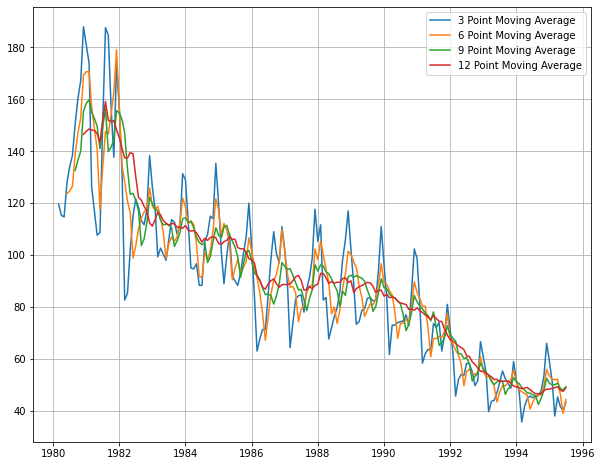

In [68]:

plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'], label='6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.plot(MovingAverage['Trailing_12'],label = '12 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

In [69]:

trailing_MovingAverage_train=MovingAverage[0:len(train)] 
trailing_MovingAverage_test=MovingAverage[len(train)-1:]

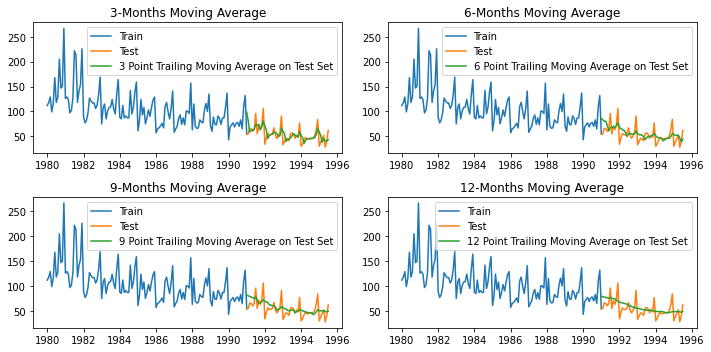

In [70]:

fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(10)
fig.set_figheight(5)

axes[0][0].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[0][0].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[0][0].plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
axes[0][0].set_title("3-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[0][1].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[0][1].plot(trailing_MovingAverage_test['Trailing_6'], label='6 Point Trailing Moving Average on Test Set')
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[1][0].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[1][0].plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
axes[1][0].set_title("9-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(trailing_MovingAverage_train['Rose'], label='Train')
axes[1][1].plot(trailing_MovingAverage_test['Rose'], label='Test')

axes[1][1].plot(trailing_MovingAverage_test['Trailing_12'],label = '12 Point Trailing Moving Average on Test Set')
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()

In [71]:
## Test Data - RMSE  - 3 point Trailing MA

rmse_model4_test_3 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_3'],squared=False)
print("For 3 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_3))

## Test Data - RMSE - 6 point Trailing MA

rmse_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))

## Test Data - RMSE - 9 point Trailing MA

rmse_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_9))

## Test Data - RMSE - 12 point Trailing MA

rmse_model4_test_12 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Trailing_12'],squared=False)
print("For 12 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_12))

For 3 point Moving Average Model forecast on the Training Data,  RMSE is 14.126
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 14.560
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 14.725
For 12 point Moving Average Model forecast on the Training Data,  RMSE is 15.234


In [72]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_model4_test_3,rmse_model4_test_6
                                          ,rmse_model4_test_9,rmse_model4_test_12]}
                           ,index=['3pointTrailingMovingAverage','6pointTrailingMovingAverage'
                                   ,'9pointTrailingMovingAverage','12pointTrailingMovingAverage'])

resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

,Test RMSE
RegressionOnTime,14.934579
Alpha=0.0976:SimpleExponentialSmoothing,33.858909
"Alpha=1.490116e-08,Beta=3.694809e-16:DoubleExponentialSmoothing",14.936916
"Alpha=0.07575,Beta=0.0541,Gamma=0.4107:TripleExponentialSmoothing",27.813988
NaiveModel,15.750902
SimpleAverageModel,53.074556
3pointTrailingMovingAverage,14.126413
6pointTrailingMovingAverage,14.560046
9pointTrailingMovingAverage,14.724503
12pointTrailingMovingAverage,15.234402


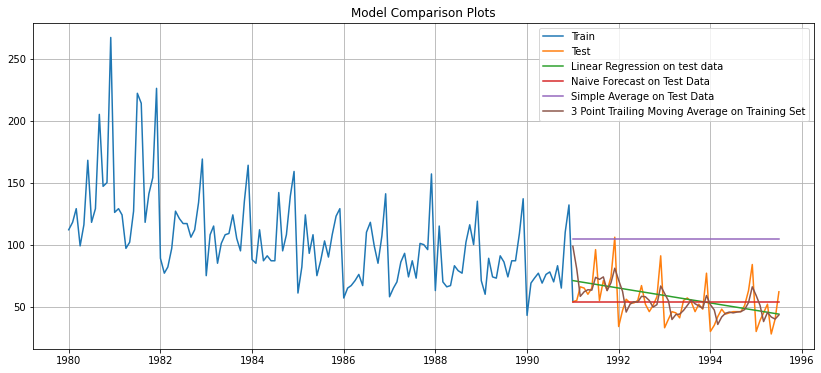

In [73]:

plt.subplots(figsize = (14,6))

plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Linear Regression on test data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## ARIMA 

In [74]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

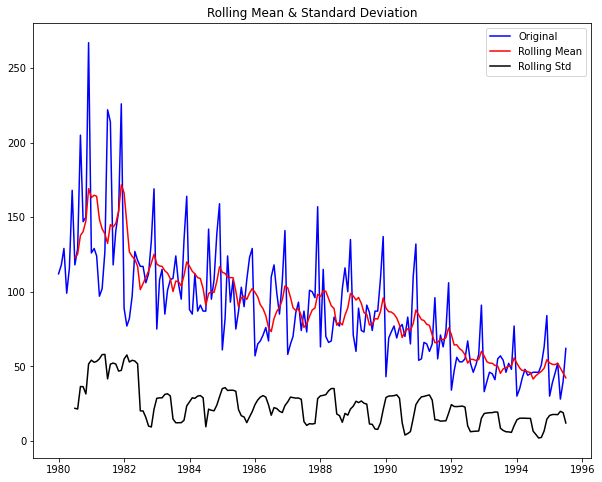

Results of Dickey-Fuller Test:
Test Statistic                  -1.877440
p-value                          0.342747
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [75]:
test_stationarity(df['Rose'])

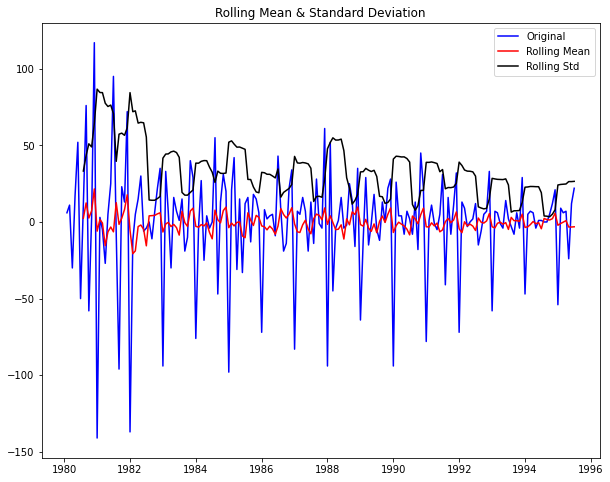

Results of Dickey-Fuller Test:
Test Statistic                -8.044614e+00
p-value                        1.808550e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [76]:
test_stationarity(df['Rose'].diff().dropna())

In [77]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

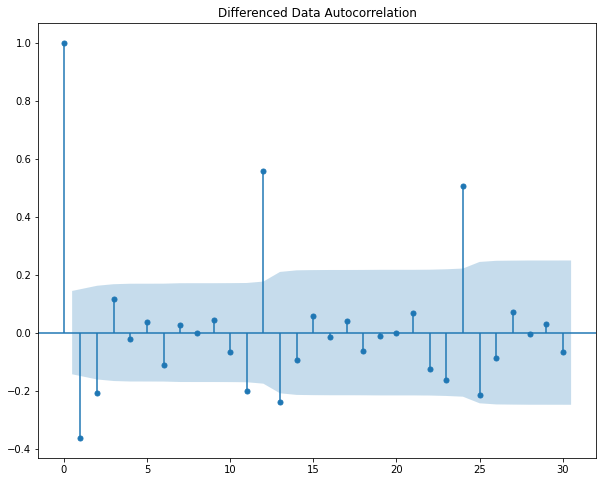

In [78]:
# plot_acf(df['RetailSales'],lags=30)
plot_acf(df['Rose'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

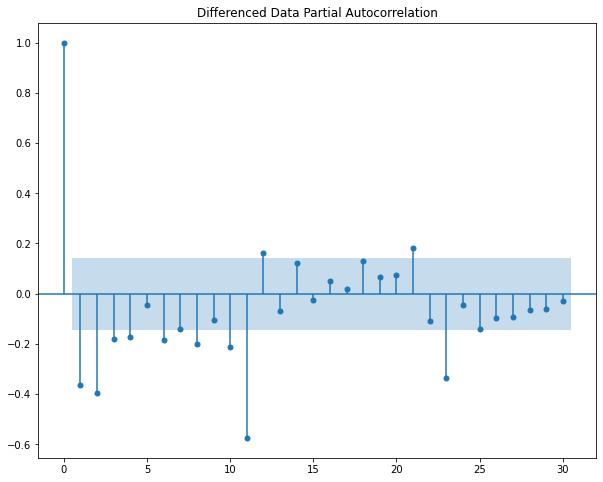

In [79]:
# plot_pacf(df['RetailSales'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show()

### SPLIT THE DATA

In [80]:
train = df[df.index < '1991-01-01']
test = df[df.index >= '1991-01-01']

In [81]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [82]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


,Rose,Month,Year
YearMonth,,,
1980-01-01,112.0,Jan,1980
1980-02-01,118.0,Feb,1980
1980-03-01,129.0,Mar,1980
1980-04-01,99.0,Apr,1980
1980-05-01,116.0,May,1980


Last few rows of Training Data


,Rose,Month,Year
YearMonth,,,
1990-08-01,70.0,Aug,1990
1990-09-01,83.0,Sep,1990
1990-10-01,65.0,Oct,1990
1990-11-01,110.0,Nov,1990
1990-12-01,132.0,Dec,1990


First few rows of Test Data


,Rose,Month,Year
YearMonth,,,
1991-01-01,54.0,Jan,1991
1991-02-01,55.0,Feb,1991
1991-03-01,66.0,Mar,1991
1991-04-01,65.0,Apr,1991
1991-05-01,60.0,May,1991


Last few rows of Test Data


,Rose,Month,Year
YearMonth,,,
1995-03-01,45.0,Mar,1995
1995-04-01,52.0,Apr,1995
1995-05-01,28.0,May,1995
1995-06-01,40.0,Jun,1995
1995-07-01,62.0,Jul,1995


In [83]:
print(train.shape)
print(test.shape)

(132, 3)
(55, 3)


### Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [84]:
from statsmodels.tsa.arima_model import ARIMA

In [85]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [86]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [87]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.7261830464226
ARIMA(0, 1, 2) - AIC:1276.8353736830445
ARIMA(1, 1, 0) - AIC:1319.3483105806022
ARIMA(1, 1, 1) - AIC:1277.7757578817404
ARIMA(1, 1, 2) - AIC:1277.3592239194302
ARIMA(2, 1, 0) - AIC:1300.609261174395
ARIMA(2, 1, 1) - AIC:1279.0456894093122
ARIMA(2, 1, 2) - AIC:1279.298693936552


In [88]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1276.835374
5,"(1, 1, 2)",1277.359224
4,"(1, 1, 1)",1277.775758
7,"(2, 1, 1)",1279.045689
8,"(2, 1, 2)",1279.298694
1,"(0, 1, 1)",1280.726183
6,"(2, 1, 0)",1300.609261
3,"(1, 1, 0)",1319.348311
0,"(0, 1, 0)",1335.152658


In [89]:
auto_ARIMA = ARIMA(train['Rose'], order=(0,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Wed, 14 Jul 2021   AIC                           1276.835
Time:                        03:28:28   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Rose    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Rose    -0.2398      0.095     -2.51

In [90]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [91]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

15.611802948827693


In [92]:
resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['ARIMA(0,1,2)'])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.611803


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

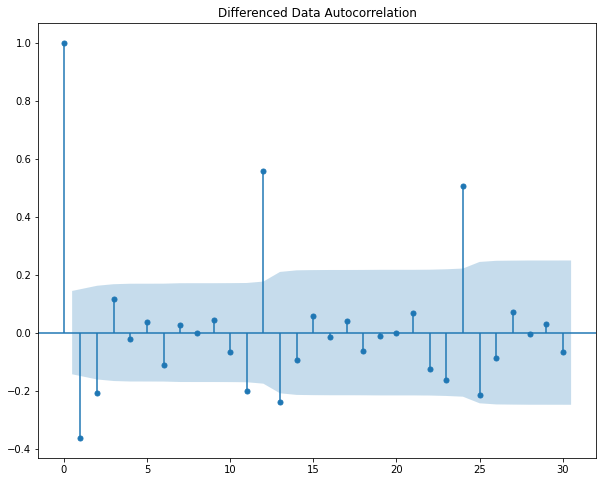

In [93]:
plot_acf(df['Rose'].diff().dropna(),lags=30,title='Differenced Data Autocorrelation')
plt.show()

### auto sarima model

In [94]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [95]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [96]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.4230827207336
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380882
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.020786938668
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635752117
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.879454069756
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894574
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383968
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918334
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383873
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.7936324918726
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.7434330946915
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483303503
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866535977
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988381131043
SARIMA(0, 1, 2)x(0, 0, 0

In [97]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
53,"(1, 1, 2)","(2, 0, 2, 12)",896.686915
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [98]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.969
Date:                            Wed, 14 Jul 2021   AIC                            887.938
Time:                                    03:28:53   BIC                            906.448
Sample:                                         0   HQIC                           895.437
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8427    189.627     -0.004      0.996    -372.504     370.819
ma.L2         -0.1573     29.791   

In [99]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [100]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,62.867262,15.928500,31.647975,94.086549
1,70.541190,16.147658,38.892361,102.190018
2,77.356410,16.147656,45.707586,109.005234
3,76.208814,16.147656,44.559990,107.857637
4,72.747397,16.147656,41.098573,104.396221


In [101]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

26.907438298773954


In [102]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse]}
                           ,index=['SARIMA(0,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE
"ARIMA(0,1,2)",15.611803
"SARIMA(0,1,2)(2,0,2,12)",26.907438


In [103]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],
                                order=(0,1,2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -647.291
Date:                            Wed, 14 Jul 2021   AIC                           1308.582
Time:                                    03:28:53   BIC                           1330.065
Sample:                                01-01-1980   HQIC                          1317.306
                                     - 07-01-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9394      0.108     -8.717      0.000      -1.151      -0.728
ma.L2         -0.1647      0.093   

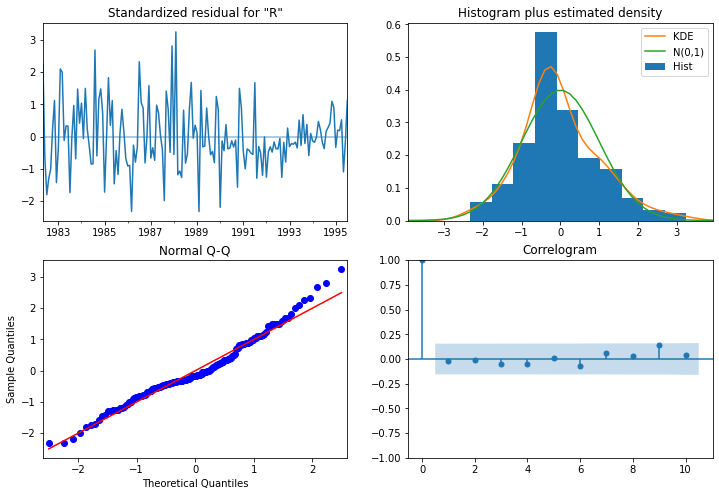

In [104]:
plt.rcParams['figure.figsize'] = [12, 8]
results_full_data_model.plot_diagnostics()
plt.show()

In [105]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=13)

In [106]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Rose,mean,mean_se,mean_ci_lower,mean_ci_upper
1995-08-01,47.515696,14.109718,19.861157,75.170235
1995-09-01,44.105824,14.490612,15.704747,72.506902
1995-10-01,47.214629,14.553044,18.691186,75.738071
1995-11-01,52.536757,14.615210,23.891471,81.182042
1995-12-01,69.629767,14.677113,40.863155,98.396379


In [107]:
rmse = mean_squared_error(df['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 27.67288931922279


In [108]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='MS'))

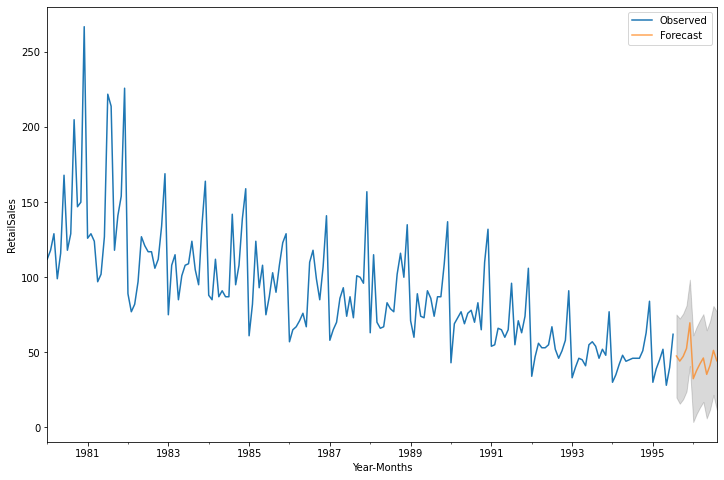

In [109]:
# plot the forecast along with the confidence band

axis = df['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [110]:
resultsDf

,RMSE
"ARIMA(0,1,2)",15.611803
"SARIMA(0,1,2)(2,0,2,12)",26.907438


## END